# Model Making Process

## Preprocess the data

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import platform
import os

print('Python ver:', platform.python_version())
print('Scikit-learn ver:', sklearn.__version__)
print('Pandas ver:', pd.__version__)
print('Numpy ver:', np.__version__)

Python ver: 3.9.19
Scikit-learn ver: 1.0.2
Pandas ver: 2.2.2
Numpy ver: 1.26.4


### Access the Dataset

In [2]:
# Read csv and check the data
cwd = os.path.dirname(os.path.abspath('__file__'))
dataset_dir = os.path.join(cwd, '..', 'Transformed dataset')
mean_path = os.path.join(dataset_dir, 'transformed_mean.csv')
var_path = os.path.join(dataset_dir, 'transformed_var.csv')

mean_csv = pd.read_csv(mean_path)
var_csv = pd.read_csv(var_path)

In [3]:
mean_csv.head()

,xpos,ypos,zpos,xvel,yvel,zvel,xacc,yacc,zacc,label
0,-0.132441,1.818894,1.126524,-0.034340,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0
1,-0.144392,1.793557,1.118971,-0.022590,-0.038763,-0.215774,-0.130912,-0.094322,-0.156462,0
2,-0.309730,1.736425,1.058666,0.008053,-0.014171,-0.241596,-0.187329,-0.094175,-0.304099,0
3,-0.312120,1.785316,1.098358,-0.016384,-0.023224,-0.176972,-0.147660,-0.086541,-0.152001,0
4,-0.231677,1.737191,1.036649,-0.033658,0.015930,-0.182137,-0.022553,0.011463,0.136443,0


In [4]:
mean_csv.count()

xpos     520
ypos     520
zpos     520
xvel     520
yvel     520
zvel     520
xacc     520
yacc     520
zacc     520
label    520
dtype: int64

In [5]:
var_csv.head()

,xpos,ypos,zpos,xvel,yvel,zvel,xacc,yacc,zacc,label
0,0.001940,0.008719,0.134980,0.010190,0.007413,0.122343,0.010610,0.014236,0.065308,0
1,0.002276,0.010267,0.081638,0.044725,0.012691,0.232494,0.042590,0.039106,0.189655,0
2,0.005804,0.017488,0.138591,0.110522,0.009268,0.282040,0.071227,0.039771,0.189879,0
3,0.003112,0.008101,0.095979,0.042904,0.005863,0.110072,0.039747,0.021820,0.072890,0
4,0.000865,0.005119,0.073720,0.003504,0.016209,0.186231,0.003395,0.022270,0.218428,0


In [6]:
var_csv.count()

xpos     520
ypos     520
zpos     520
xvel     520
yvel     520
zvel     520
xacc     520
yacc     520
zacc     520
label    520
dtype: int64

### Merging the dataset into a single DataFrame

In [9]:
merged.count()
merged.to_csv('test_liat.csv')

In [8]:
column_at_end = ['label']
merged = merged[[c for c in merged if c not in column_at_end]
                + [c for c in column_at_end if c in merged]]
merged.head()

,xpos_x,ypos_x,zpos_x,xvel_x,yvel_x,zvel_x,xacc_x,yacc_x,zacc_x,xpos_y,ypos_y,zpos_y,xvel_y,yvel_y,zvel_y,xacc_y,yacc_y,zacc_y,label
0,-0.132441,1.818894,1.126524,-0.03434,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0.001940,0.008719,0.134980,0.010190,0.007413,0.122343,0.010610,0.014236,0.065308,0
1,-0.132441,1.818894,1.126524,-0.03434,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0.002276,0.010267,0.081638,0.044725,0.012691,0.232494,0.042590,0.039106,0.189655,0
2,-0.132441,1.818894,1.126524,-0.03434,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0.005804,0.017488,0.138591,0.110522,0.009268,0.282040,0.071227,0.039771,0.189879,0
3,-0.132441,1.818894,1.126524,-0.03434,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0.003112,0.008101,0.095979,0.042904,0.005863,0.110072,0.039747,0.021820,0.072890,0
4,-0.132441,1.818894,1.126524,-0.03434,-0.008131,-0.254972,-0.062188,-0.022162,-0.127762,0.000865,0.005119,0.073720,0.003504,0.016209,0.186231,0.003395,0.022270,0.218428,0


In [9]:
merged.count()

xpos_x    169000
ypos_x    169000
zpos_x    169000
xvel_x    169000
yvel_x    169000
zvel_x    169000
xacc_x    169000
yacc_x    169000
zacc_x    169000
xpos_y    169000
ypos_y    169000
zpos_y    169000
xvel_y    169000
yvel_y    169000
zvel_y    169000
xacc_y    169000
yacc_y    169000
zacc_y    169000
label     169000
dtype: int64

## Making the model

### Assign variables

In [10]:
features = merged.drop('label', axis=1)
X = features.values
Y = merged['label']
Y = Y.values

### K-Fold test

In [11]:
model_to_evaluate = []
model_to_evaluate.append(('DT', DecisionTreeClassifier()))
model_to_evaluate.append(('NB', GaussianNB()))
model_to_evaluate.append(('KNN', KNeighborsClassifier()))

In [12]:
results=[]
names=[]

for name, model in model_to_evaluate:
    kfold = StratifiedKFold(n_splits=3)
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_result)
    names.append(name)
    print(f'Akurasi {name}: {cv_result.mean()} dengan std dev {cv_result.std()}')
    print()

Akurasi DT: 0.8266973651412305 dengan std dev 0.1321252457584269

Akurasi NB: 0.9611183325487215 dengan std dev 0.0015576339375698233



KeyboardInterrupt: 

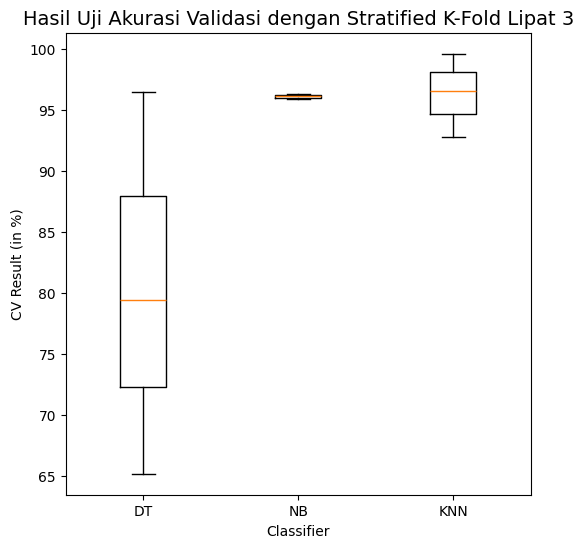

In [ ]:
plt.figure(figsize=(6,6))
plt.boxplot(list(map(lambda item: item*100, results)), labels=names)
plt.title('Hasil Uji Akurasi Validasi dengan Stratified K-Fold Lipat 3', fontdict={'fontweight': 'normal', 'fontsize':'14'})
plt.xlabel('Classifier')
plt.ylabel('CV Result (in %)')
plt.savefig('CV Result.png', dpi=300)
plt.show()


### Test each of the algorithm

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=.10, random_state=1)

In [ ]:
for name, model in model_to_evaluate:
    print(f'Nama model: {name}')
    model.fit(X_train, Y_train)
    predictions = model.predict(X_val)

    # Evaluation
    print(classification_report(Y_val,predictions))


Nama model: DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15147
           1       1.00      1.00      1.00      1753

    accuracy                           1.00     16900
   macro avg       1.00      1.00      1.00     16900
weighted avg       1.00      1.00      1.00     16900

Nama model: NB
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15147
           1       0.83      0.97      0.90      1753

    accuracy                           0.98     16900
   macro avg       0.91      0.97      0.94     16900
weighted avg       0.98      0.98      0.98     16900

Nama model: KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15147
           1       1.00      1.00      1.00      1753

    accuracy                           1.00     16900
   macro avg       1.00      1.00      1.00     16900
weighted avg       1.00     

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()

final_model = VotingClassifier(
    estimators=[
        ("decision_tree", dt),
        ("k-nearest_neighbor", knn),
        ("gaussnb", nb),
    ],
    voting="hard",
)

In [ ]:
final_model.fit(X_train, Y_train)
voting_prediction = model.predict(X_val)
print(classification_report(Y_val, voting_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15147
           1       1.00      1.00      1.00      1753

    accuracy                           1.00     16900
   macro avg       1.00      1.00      1.00     16900
weighted avg       1.00      1.00      1.00     16900



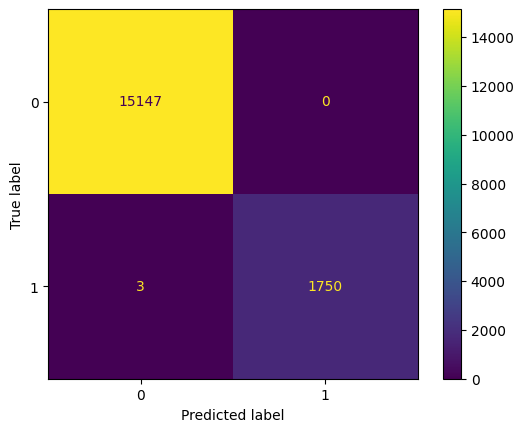

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_val, voting_prediction)

# Save Model

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, 'voting_classifier_10_individuals.pkl')

['voting_classifier_10_individuals.pkl']